In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

Z 分数方法
Z 分数方法通过测量数据点与平均值的标准差数来识别异常值。当数据呈正态分布时，此方法最有效。

Data shape before outlier removal: (150, 4)
Data shape after outlier removal (Z-Score): (149, 4)


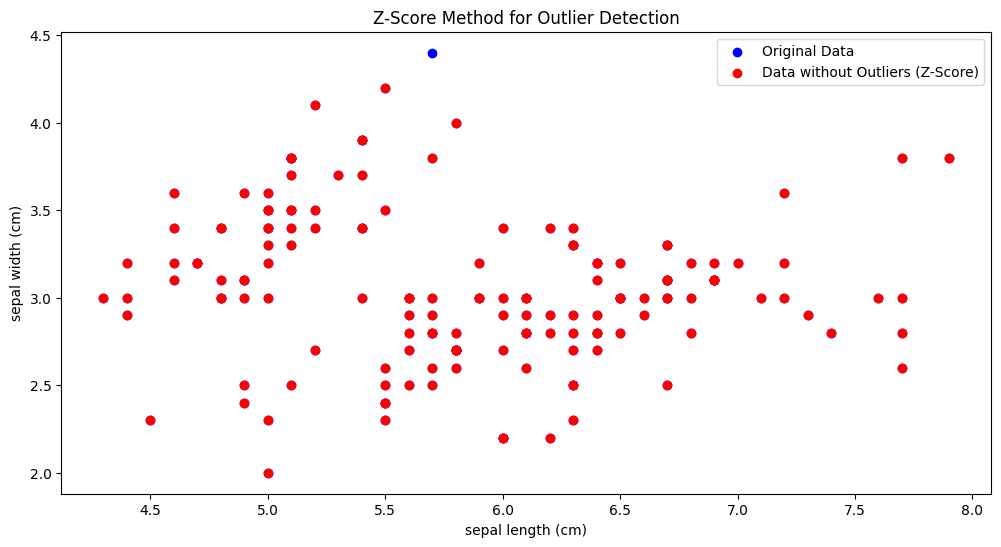

In [2]:
z_scores = np.abs(stats.zscore(data)) 
threshold = 3 
outliers = np.where(z_scores > threshold) 

data_zs = data[(z_scores < threshold).all(axis=1)] 
print("Data shape before outlier removal:", data.shape)
print("Data shape after outlier removal (Z-Score):", data_zs.shape)
# Visualization
plt.figure(figsize=(12,6)) 
plt.scatter(data.iloc[:, 0],data.iloc[:, 1],color='blue',label='Original Data') 
plt.scatter(data_zs.iloc[:, 0], data_zs.iloc[:, 1], color='red', label='Data without Outliers (Z-Score)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Z-Score Method for Outlier Detection") 
plt.legend() 
plt.show() 

四分位距 （IQR） 方法
这是识别数据集中异常值的最简单、使用最广泛的方法之一。IQR 方法通过查看中间 50% 数据的分布来识别异常值。

Data shape before outlier removal: (150, 4)
Data shape after outlier removal (IQR): (146, 4)


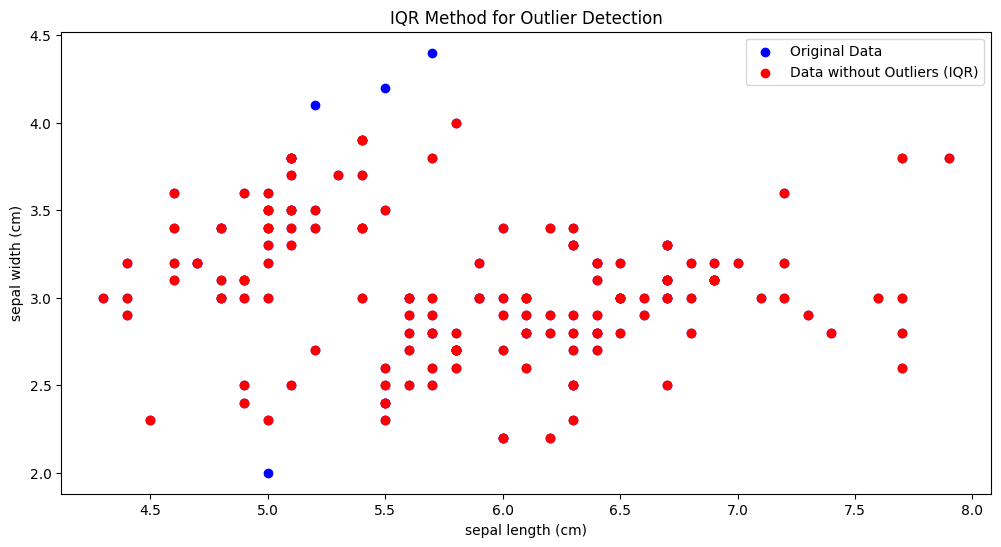

In [3]:
Q1 = data.quantile(0.25) 
Q3 = data.quantile(0.75) 
IQR = Q3 - Q1 
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1) 
# Remove outliers
data_iqr = data[~outliers]

print("Data shape before outlier removal:", data.shape)
print("Data shape after outlier removal (IQR):", data_iqr.shape)
# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], color='blue', label='Original Data')
plt.scatter(data_iqr.iloc[:, 0], data_iqr.iloc[:, 1], color='red', label='Data without Outliers (IQR)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('IQR Method for Outlier Detection')
plt.legend()
plt.show()

隔离林
隔离森林是一种专门用于检测异常值的算法。

Data shape before outlier removal: (150, 4)
Data shape after outlier removal (Isolation Forest): (135, 4)


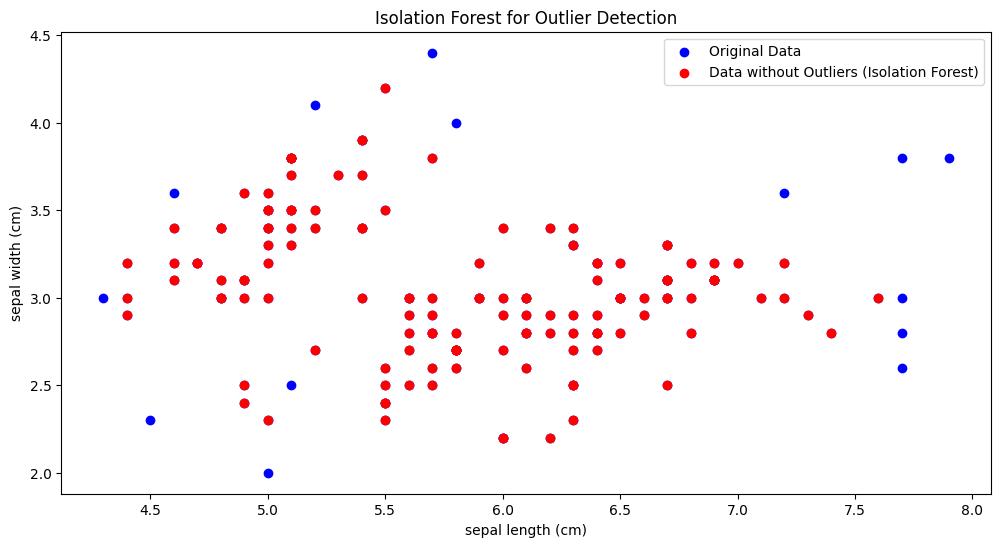

In [4]:
from sklearn.ensemble import IsolationForest

# Initialize the model
iso_forest = IsolationForest(contamination=0.1)

# Fit the model
outliers = iso_forest.fit_predict(data)

# Remove outliers
data_if = data[outliers == 1]
print("Data shape before outlier removal:", data.shape)
print("Data shape after outlier removal (Isolation Forest):", data_if.shape)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], color='blue', label='Original Data')
plt.scatter(data_if.iloc[:, 0], data_if.iloc[:, 1], color='red', label='Data without Outliers (Isolation Forest)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Isolation Forest for Outlier Detection')
plt.legend()
plt.show()

DBSCAN（带噪声的基于密度的应用程序空间聚类）
这种方法可以揭示任意形状的聚类，并将异常值识别为不属于任何聚类的点（[请参阅此研究文章]）。此方法在处理数据集中的噪声时非常有效。

Data shape before outlier removal: (150, 4)
Data shape after outlier removal (DBSCAN): (133, 4)


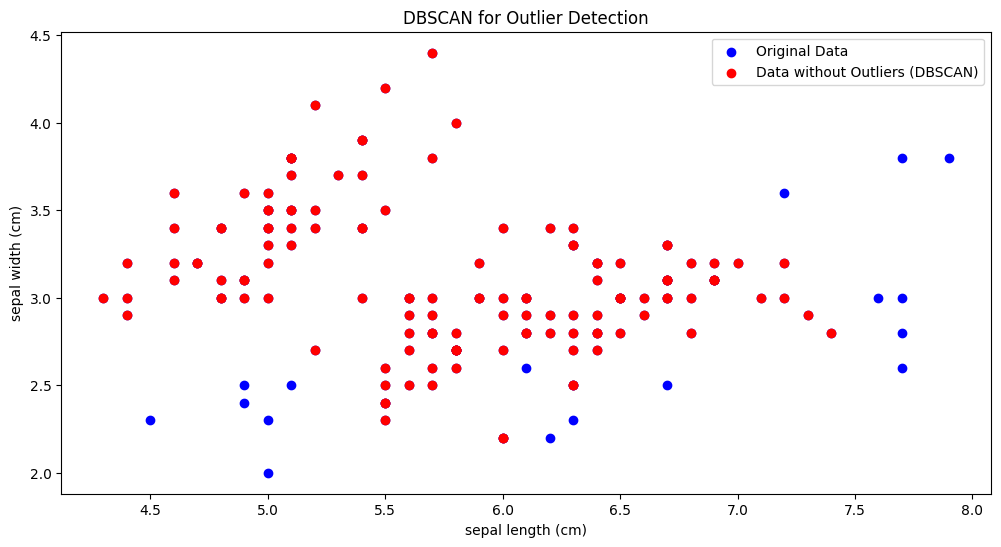

In [5]:
from sklearn.cluster import DBSCAN 
dbscan = DBSCAN(eps=0.5,min_samples = 5) 
clusters = dbscan.fit_predict(data) 
outliers = clusters == -1 
data_dbscan = data[~outliers] 

print("Data shape before outlier removal:", data.shape)
print("Data shape after outlier removal (DBSCAN):", data_dbscan.shape)
# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], color='blue', label='Original Data')
plt.scatter(data_dbscan.iloc[:, 0], data_dbscan.iloc[:, 1], color='red', label='Data without Outliers (DBSCAN)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('DBSCAN for Outlier Detection')
plt.legend()
plt.show()

时间序列数据集的异常值检测
与静态数据不同，时间序列数据具有时间顺序，其中每个数据点都与其过去和未来值相关。这种时间依赖性意味着时间序列中的异常值不仅仅是一个孤立的点，而是会影响后续数据点，从而使检测更加复杂和棘手。时间序列数据通常表现出季节性和趋势。这些模式有时使人难以区分真正的季节性峰值和异常值。35°C 在夏季可能是正常数据点，但在冬季可能是异常值，这是上下文异常值的一个例子。由于时间序列是一个动态数据集，因此很难为时间序列中的异常值检测设置静态阈值。

我们将在下一节中讨论一些用于识别和删除合成时间序列数据集上的异常值的常用技术。常见的方法包括

滚动统计信息
季节性分解
先知
隔离林
有马

创建示例时间序列数据集
我们首先创建一个包含季节性、趋势和注入异常值的合成时间序列数据集。

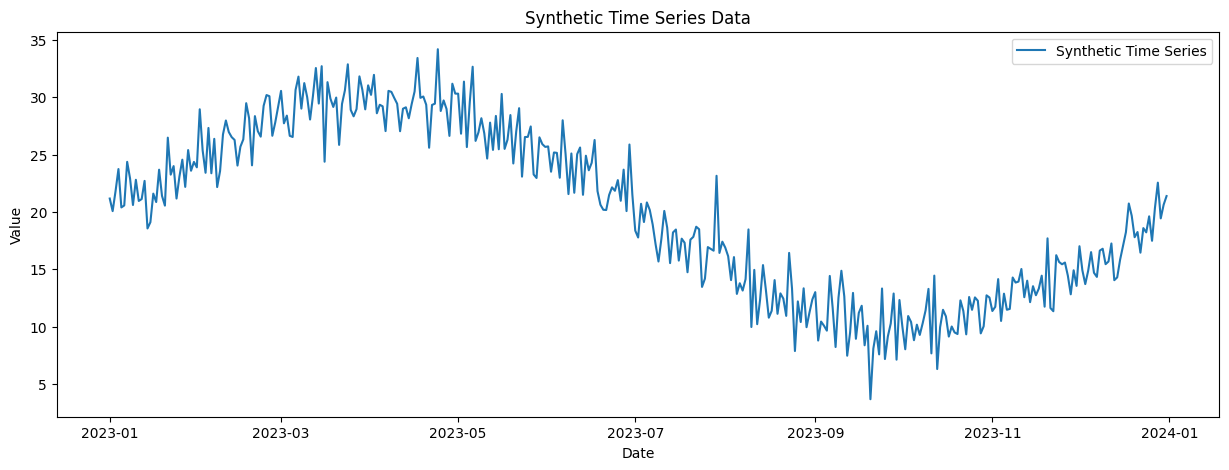

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
date_range = pd.date_range(start='2023-01-01',periods=365,freq='D')
# Generate synthetic data (e.g., daily temperatures with some noise)
np.random.seed(42)  # For reproducibility
data = 20 + 10 * np.sin(2 * np.pi * date_range.dayofyear / 365) + np.random.normal(0, 2, len(date_range))
# Create a DataFrame
df = pd.DataFrame({'Date': date_range, 'Value': data})
df.set_index('Date', inplace=True)  # Set the date range as the index
# Plot the time series
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Value'], label='Synthetic Time Series')
plt.title('Synthetic Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

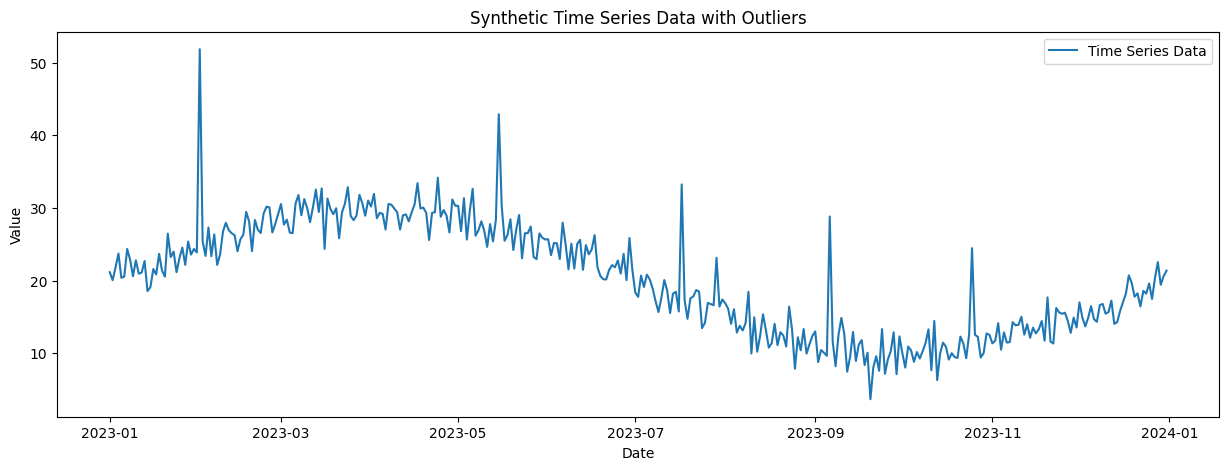

In [7]:
data = np.array(data)  
outlier_indices = np.random.choice(len(data),size=5,replace=False) 
data_with_outliers = data.copy() 
data_with_outliers[outlier_indices] = data_with_outliers[outlier_indices] + np.random.normal(15,5,size=outlier_indices.shape[0]) 
df = pd.DataFrame({'Date':date_range,'Value':data_with_outliers}) 
df.set_index('Date',inplace=True) 
# Visualize the original time series
plt.figure(figsize=(15,5))
plt.plot(df.index, df['Value'], label='Time Series Data')
plt.title('Synthetic Time Series Data with Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

滚动统计
此方法计算滚动统计量（例如，滚动平均值和标准差），并根据与这些统计量的偏差识别异常值。

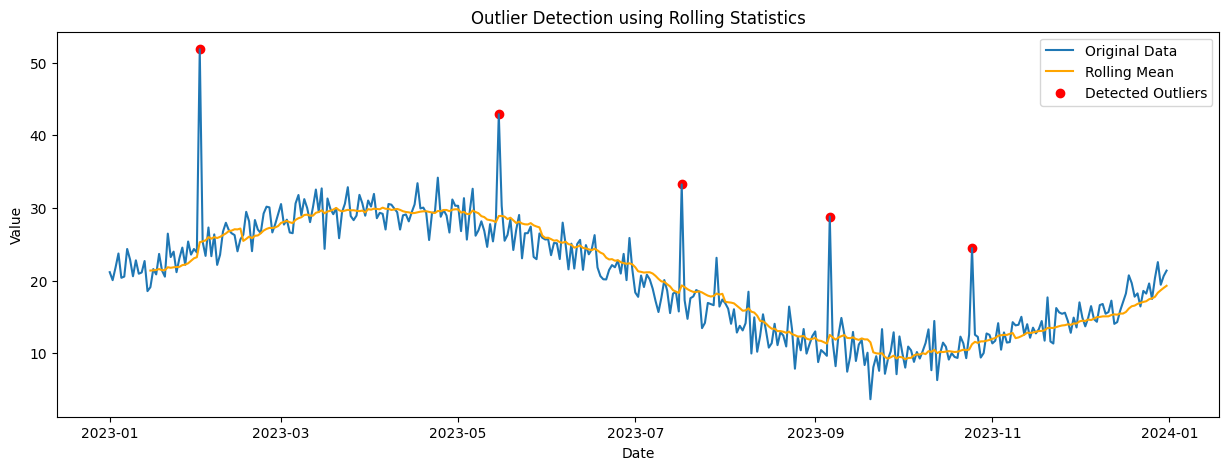

In [8]:
window_size = 15 
rolling_mean = df['Value'].rolling(window=window_size).mean() 
rolling_std = df['Value'].rolling(window=window_size).std() 

threshold = 3 
outliers = df[np.abs(df['Value'] - rolling_mean) > threshold * rolling_std] 
# Visualize the results
plt.figure(figsize=(15,5))
plt.plot(df.index, df['Value'], label='Original Data')
plt.plot(df.index, rolling_mean, color='orange', label='Rolling Mean')
plt.scatter(outliers.index, outliers['Value'], color='red', label='Detected Outliers')
plt.title('Outlier Detection using Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

季节性分解
使用季节性分解，我们将时间序列分解为趋势、季节性和残差分量。离群值通常在残差分量中可见。

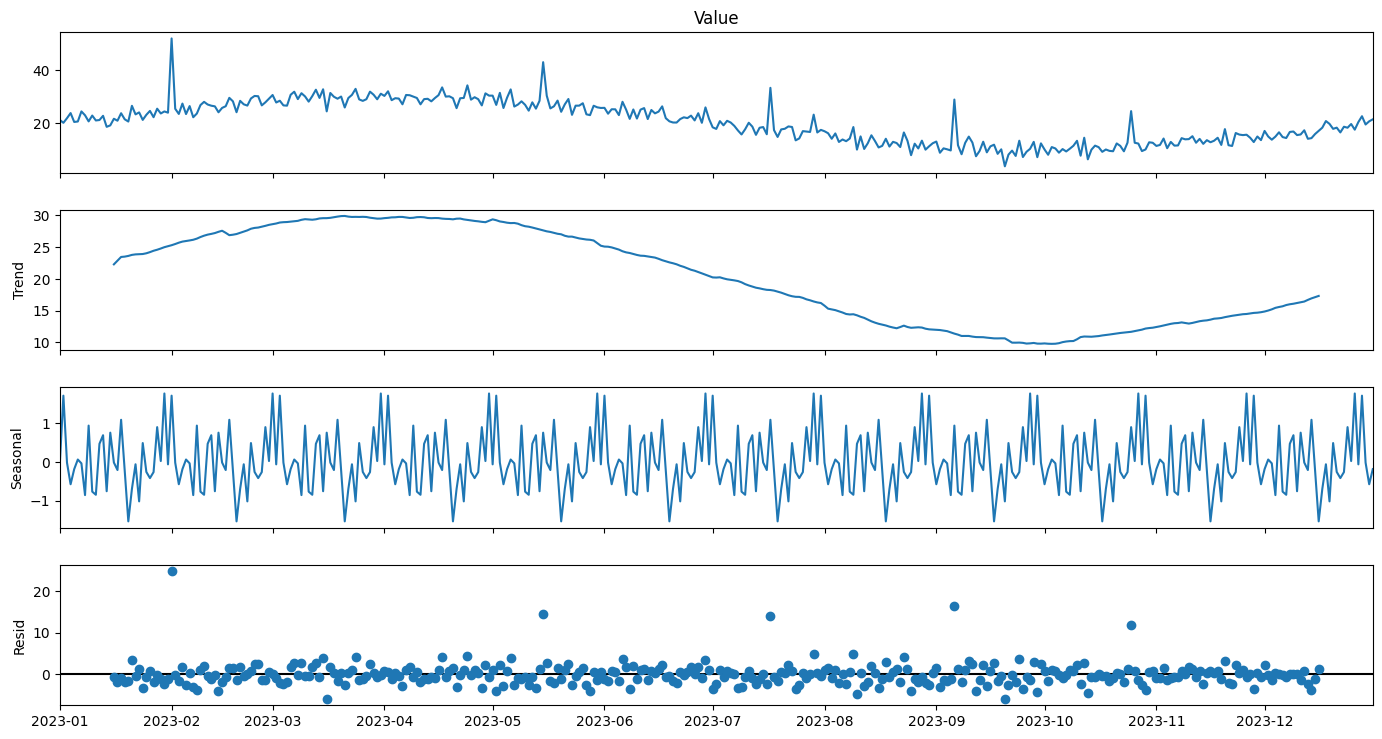

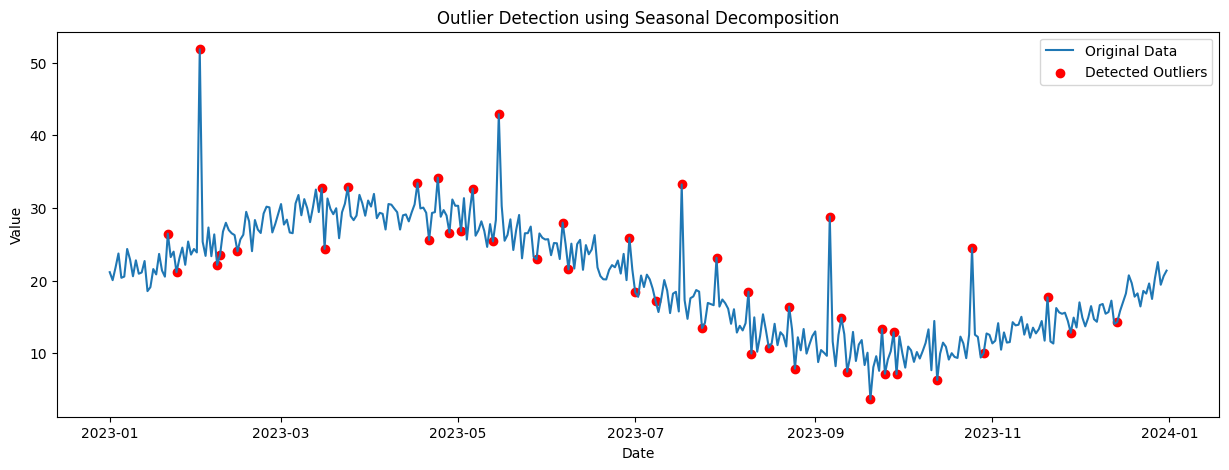

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose 

decomposition = seasonal_decompose(df['Value'],model='additive',period=30) 
fig = decomposition.plot() 
fig.set_size_inches(15,8) 
plt.show() 

residual = decomposition.resid.dropna() 
z_scores = np.abs((residual - residual.mean() / residual.std())) 
outliers_decomp = residual[z_scores > 3] 
# Visualize the results
plt.figure(figsize=(15,5))
plt.plot(df.index, df['Value'], label='Original Data')
plt.scatter(outliers_decomp.index, df.loc[outliers_decomp.index]['Value'], color='red', label='Detected Outliers')
plt.title('Outlier Detection using Seasonal Decomposition')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

先知
Prophet 是由 Facebook 开发的开源时间序列预测工具（[请参阅此 GitHub 页面]）。它旨在处理具有较强季节性模式和多个季节历史数据的数据。它是一个强大的工具，可以对季节性和趋势进行建模，并且可以通过将实际值与预测值进行比较来用于异常检测（[参考文章]）。下面是一个代码片段，用于说明如何实现此方法以删除异常值。

In [11]:
pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/13.3 MB 8.3 MB/s eta 0:00:02
   ------------ --------------------------- 4.2/13.3 MB 20.9 MB/s eta 0:00:01
   -------------------------------- ------- 10.7/13.3 MB 21.0 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 23.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 50.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


c:\Users\石天辰\.conda\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
04:15:17 - cmdstanpy - INFO - Chain [1] start processing
04:15:17 - cmdstanpy - INFO - Chain [1] done processing


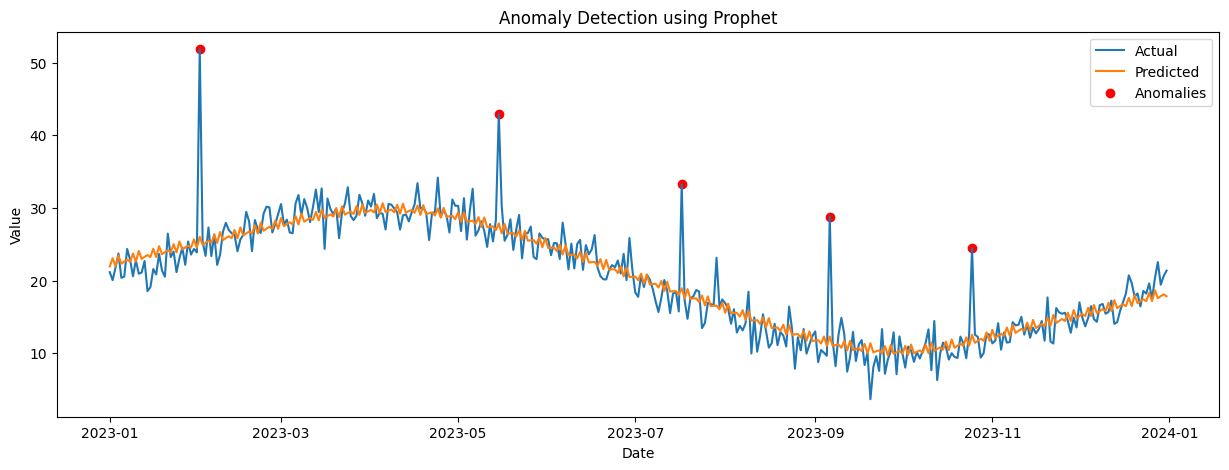

In [12]:
from prophet import Prophet

# Prepare the data for Prophet
df_prophet = df.reset_index().rename(columns={'Date': 'ds', 'Value': 'y'})

# Fit the Prophet model
model = Prophet()
model.fit(df_prophet)
# Create a dataframe with future dates for prediction (not necessary here)
future = model.make_future_dataframe(periods=0)
forecast = model.predict(future)

# Calculate residuals
df_prophet['yhat'] = forecast['yhat']
df_prophet['residual'] = df_prophet['y'] - df_prophet['yhat']

# Identify anomalies (3 standard deviations away from the mean)
std_residual = np.std(df_prophet['residual'])
threshold = 3 * std_residual
df_prophet['anomaly'] = df_prophet['residual'].apply(lambda x: 1 if np.abs(x) > threshold else 0)

# Extract anomalies
anomalies_prophet = df_prophet[df_prophet['anomaly'] == 1]
# Visualize the results
plt.figure(figsize=(15,5))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual')
plt.plot(df_prophet['ds'], df_prophet['yhat'], label='Predicted')
plt.scatter(anomalies_prophet['ds'], anomalies_prophet['y'], color='red', label='Anomalies')
plt.title('Anomaly Detection using Prophet')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

隔离林
Isolation Forest 是一种无监督机器学习 （scikit-learn 文档页面） 算法，对于异常检测特别有效，包括在时间序列数据中。该算法的工作原理是随机选择一个特征，然后随机选择所选特征的最大值和最小值之间的拆分值。其背后的逻辑是，异常值比正常点更有可能在随机分区过程中更早地被隔离（[请参阅此研究文章]) .

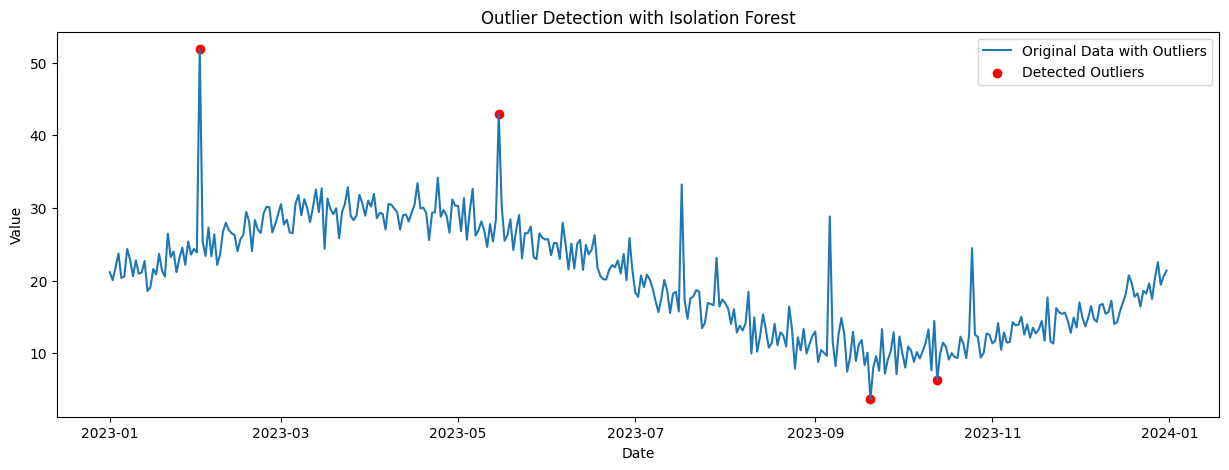

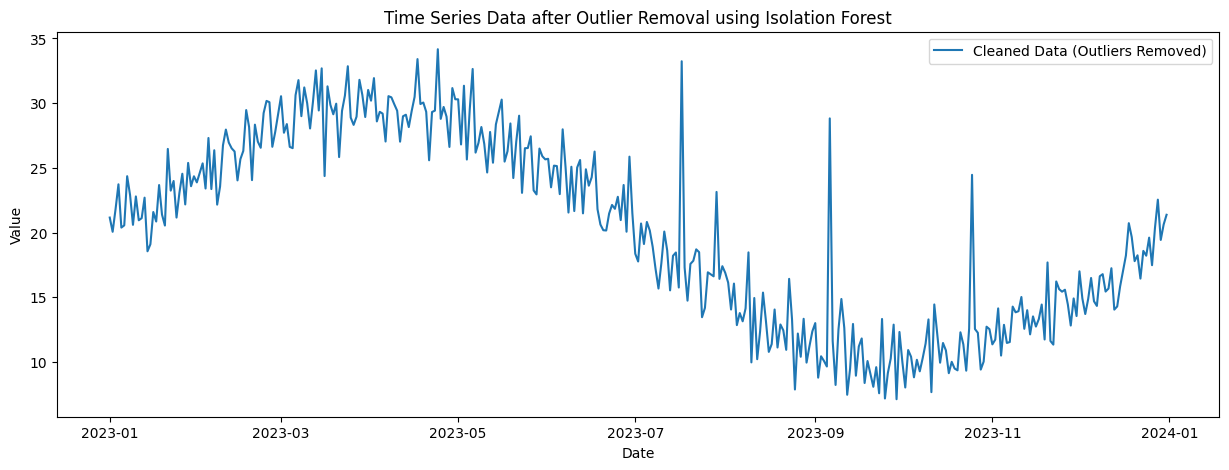

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


# Reshape the data to 2D array (required by IsolationForest)
X = df['Value'].values.reshape(-1, 1)
iso_forest = IsolationForest(contamination=0.01,random_state=42) 
df['Anomaly'] = iso_forest.fit_predict(X) 
outliers = df[df['Anomaly'] == -1] 
normal_data = df[df['Anomaly'] == 1] 
df_cleaned = df[df['Anomaly'] == 1] 

# Plot the original time series with detected outliers
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Value'], label='Original Data with Outliers')
plt.scatter(outliers.index, outliers['Value'], color='red', label='Detected Outliers')
plt.title('Outlier Detection with Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot the cleaned time series after removing outliers
plt.figure(figsize=(15, 5))
plt.plot(df_cleaned.index, df_cleaned['Value'], label='Cleaned Data (Outliers Removed)')
plt.title('Time Series Data after Outlier Removal using Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

有马
ARIMA（AutoRegressive Integrated Moving Average）是一种广泛使用的时间序列预测统计方法，它可用于通过分析残差（实际值与预测值之间的差异）来检测和删除异常值。

c:\Users\石天辰\.conda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


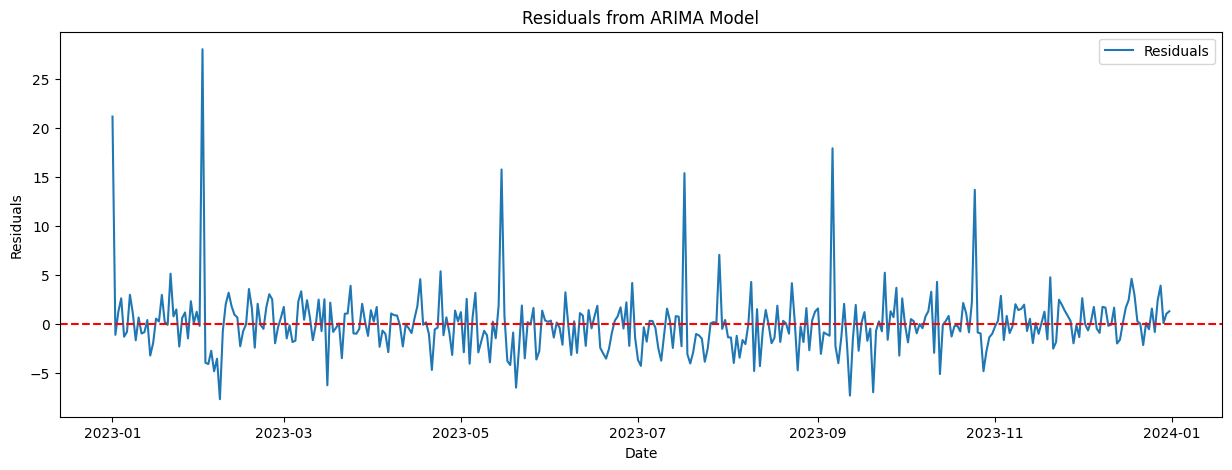

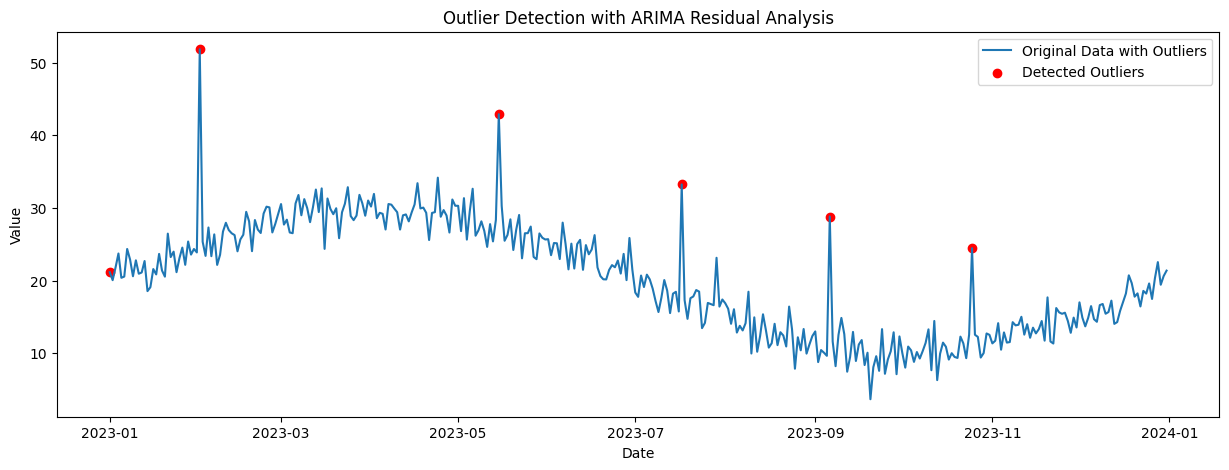

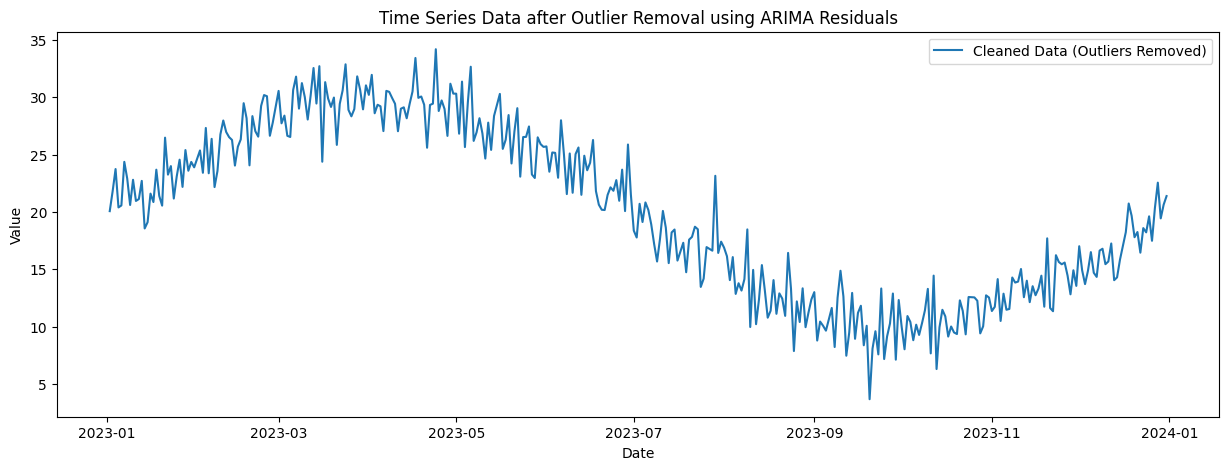

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats

model = ARIMA(df['Value'],order=(5,1,0)) 
model_fit = model.fit() 
df['Residuals'] = model_fit.resid 

plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Residuals'], label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals from ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

z_scores = np.abs(stats.zscore(df['Residuals'])) 
df['Outlier'] = z_scores > 3 

df_cleaned = df[df['Outlier'] == False] 

# Plot the original time series with detected outliers
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Value'], label='Original Data with Outliers')
plt.scatter(df[df['Outlier']].index, df[df['Outlier']]['Value'], color='red', label='Detected Outliers')
plt.title('Outlier Detection with ARIMA Residual Analysis')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot the cleaned time series after removing outliers
plt.figure(figsize=(15, 5))
plt.plot(df_cleaned.index, df_cleaned['Value'], label='Cleaned Data (Outliers Removed)')
plt.title('Time Series Data after Outlier Removal using ARIMA Residuals')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()